## imports

In [ ]:
import random
import matplotlib.pyplot as plt


## constants

## Individuals

In [ ]:

# Define the Individual class
class Individual:
    def __init__(self, genotype=None):
        self.genotype = genotype if genotype is not None else [random.randint(0, 1) for _ in range(N)]
        self.fitness = calculate_fitness(self.genotype)


## Fitness

In [ ]:
# Fitness function: evaluate the total value while penalizing overweight solutions
def calculate_fitness(genotype):
    total_value = sum([genotype[i] * values[i] for i in range(N)])
    total_weight = sum([genotype[i] * weights[i] for i in range(N)])
    if total_weight > capacity:
        return 0  # Penalize overweight solutions
    return total_value


## operators

In [ ]:

# Single-point crossover
def crossover(parent1, parent2):
    point = random.randint(1, N - 1)
    offspring_genotype = parent1.genotype[:point] + parent2.genotype[point:]
    return Individual(offspring_genotype)

# Mutation: flip random bits
def mutate(individual, mutation_rate):
    for i in range(N):
        if random.random() < mutation_rate:
            individual.genotype[i] = 1 - individual.genotype[i]  # Flip bit
    individual.fitness = calculate_fitness(individual.genotype)


## selection

In [ ]:

# Tournament selection
def select_parent(population):
    tournament_size = 3
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: x.fitness, reverse=True)
    return tournament[0]


## initialzation

In [ ]:

# Random initialization of problem data
def initialize_knapsack_problem(num_items):
    values = [random.randint(10, 100) for _ in range(num_items)]  # Random values between 10 and 100
    weights = [random.randint(1, 50) for _ in range(num_items)]   # Random weights between 1 and 50
    capacity = random.randint(50, 150)                            # Random capacity between 50 and 150
    return values, weights, capacity

# Initialize the population with random individuals
def initialize_population(population_size):
    return [Individual() for _ in range(population_size)]


## main

In [ ]:

# Run the genetic algorithm
def genetic_algorithm(population_size, generations, mutation_rate):
    population = initialize_population(population_size)
    best_fitness_over_time = []

    for generation in range(generations):
        # Sort population by fitness
        population.sort(key=lambda x: x.fitness, reverse=True)
        best_fitness = population[0].fitness
        best_fitness_over_time.append(best_fitness)

        # Display progress
        if generation % 100 == 0 or generation == generations - 1:
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

        # Create the next generation
        next_generation = []
        for _ in range(population_size):
            parent1 = select_parent(population)
            parent2 = select_parent(population)
            offspring = crossover(parent1, parent2)
            mutate(offspring, mutation_rate)
            next_generation.append(offspring)

        population = next_generation

    # Get the best solution found
    best_individual = max(population, key=lambda x: x.fitness)
    return best_individual, best_fitness_over_time


## run

Number of items (N): 7
Values: [18, 20, 99, 13, 49, 37, 94]
Weights: [40, 18, 28, 43, 28, 24, 35]
Capacity: 126
Generation 0: Best Fitness = 262
Generation 100: Best Fitness = 279
Generation 200: Best Fitness = 279
Generation 300: Best Fitness = 279
Generation 400: Best Fitness = 279
Generation 499: Best Fitness = 279
Best solution genotype: [0, 0, 1, 0, 1, 1, 1]
Best solution fitness (total value): 279


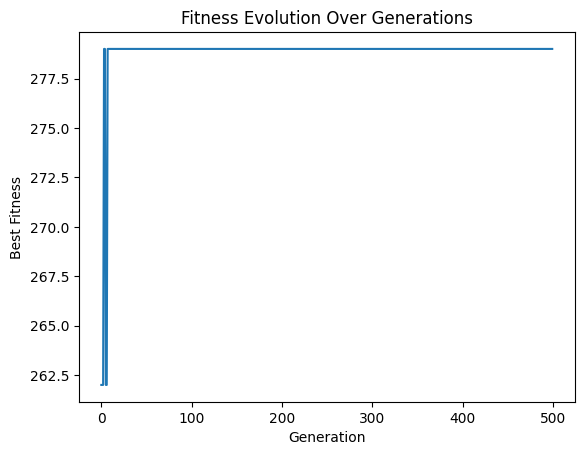

In [9]:

# Randomly initialize the problem with N items
N = random.randint(5, 20)  # Number of items between 5 and 20
values, weights, capacity = initialize_knapsack_problem(N)


# Example usage of the Genetic Algorithm for the Knapsack problem
population_size = 50
generations = 500
mutation_rate = 0.05

print(f"Number of items (N): {N}")
print(f"Values: {values}")
print(f"Weights: {weights}")
print(f"Capacity: {capacity}")

best_solution, fitness_over_time = genetic_algorithm(population_size, generations, mutation_rate)

# Output the best solution
print(f"Best solution genotype: {best_solution.genotype}")
print(f"Best solution fitness (total value): {best_solution.fitness}")

# Visualization of the fitness evolution over time
plt.plot(fitness_over_time)
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.show()
